In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from numpy import nan as NA
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


drive.mount('/content/drive')

Mounted at /content/drive


# Data Import

In [ ]:
import chardet
import glob



def isItUnicode(filename):
    with open(filename, 'rb') as f:
        encodingInfo = chardet.detect(f.read())
        if "UTF" not in encodingInfo['encoding']:
            print("This isn't Unicode! It's", encodingInfo['encoding'])
        else:
            print("Yep, it's Unicode.")

In [ ]:
isItUnicode('/content/drive/MyDrive/Notebooks/bank-marketing.csv')

This isn't Unicode! It's ascii


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Notebooks/bank-marketing.csv',na_values=['unknown'])

In [ ]:
df.describe().T

count          mean           std     min      25%      50%  \
age        45211.0     40.936210     10.618762    18.0     33.0     39.0   
age group  45211.0      3.645861      1.083271     1.0      3.0      3.0   
salary     45211.0  57006.171065  32085.718415     0.0  20000.0  60000.0   
balance    45211.0   1362.272058   3044.765829 -8019.0     72.0    448.0   
day        45211.0     15.806419      8.322476     1.0      8.0     16.0   
duration   45211.0    258.163080    257.527812     0.0    103.0    180.0   
campaign   45211.0      2.763841      3.098021     1.0      1.0      2.0   
pdays      45211.0     40.197828    100.128746    -1.0     -1.0     -1.0   
previous   45211.0      0.580323      2.303441     0.0      0.0      0.0   
response   45211.0      0.116985      0.321406     0.0      0.0      0.0   

               75%       max  
age           48.0      95.0  
age group      4.0       9.0  
salary     70000.0  120000.0  
balance     1428.0  102127.0  
day           21.0      31.0  
duration     319.0    4918.0  
campaign       3.0      63.0  
pdays         -1.0     871.0  
previous       0.0     275.0  
response       0.0       1.0

# Handling missing values

In [ ]:
pd.set_option('display.max_columns', None)

1. **Age**: Age of the customer.
2. **Age Group**: What age group the customer falls into.
3. **Eligibility**: Whether the customer is eligible for the talk or not.
4. **Job**: The customer's occupation.
5. **Salary**: Salary of the customer.
6. **Marital Status**: Whether the customer is married or not.
7. **Education Level**: Level of education completed.
8. **Marital-Education Status**: Marital status and level of education.
9. **Targeted**: Whether the customer is being targeted or not.
10. **Default Status**: If the customer is on the default list or not.
11. **Account Balance**: Remaining balance in their accounts.
12. **Housing Status**: Information about housing.
13. **Loan Status**: Whether the customer has a prior loan or not.
14. **Contact Source**: Source of this information.
15. **Day**: Today's date.
16. **Month**: Current month.
17. **Duration**: Number of days.
18. **Campaign**: Marketing campaign details.
19. **Pdays**: Number of days that have passed since the client was last contacted.
20. **Previous Response**: Previous response from the customer.
21. **POutcome**: Outcome of the previous marketing campaign.
22. **Y (Decision)**: Yes or No decision.
23. **Response**: Response from the actor.

In [ ]:
df.nunique().sort_values(ascending=False)

balance              7168
duration             1573
pdays                 559
age                    77
campaign               48
previous               41
day                    31
marital-education      12
month                  12
job                    11
salary                 11
age group               9
marital                 3
education               3
poutcome                3
y                       2
housing                 2
contact                 2
loan                    2
default                 2
targeted                2
eligible                2
response                2
dtype: int64

In [ ]:
for i in df.columns:
  print(i,df[i].unique())
  print('--------------')

age [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
--------------
age group [5 4 3 2 6 8 7 1 9]
--------------
eligible ['Y' 'N']
--------------
job ['management' 'technician' 'entrepreneur' 'blue-collar' nan 'retired'
 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
--------------
salary [100000  60000 120000  20000      0  55000  50000  70000   8000  16000
   4000]
--------------
marital ['married' 'single' 'divorced']
--------------
education ['tertiary' 'secondary' nan 'primary']
--------------
marital-education ['married-tertiary' 'single-secondary' 'married-secondary'
 'married-unknown' 'single-unknown' 'single-tertiary' 'divorced-tertiary'
 'married-primary' 'divorced-secondary' 'single-primary'
 'divorced-primary' 'divorced-unknown']
--------------
targeted ['yes' 'no'

In [ ]:
df_cp = df.copy()

In [ ]:
hot_col = ['eligible','job','targeted','default','housing','loan','contact','month','marital','marital-education']
drp = ['y']


hot = pd.get_dummies(df_cp[hot_col])
hot = hot.astype('float64')
df_cp = df_cp.drop(hot_col,axis=1)
df_cp = df_cp.join(hot)

In [ ]:
education_order = {'unknown':0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
df_cp['education'] = df_cp['education'].map(education_order)

In [ ]:
from sklearn.preprocessing import LabelEncoder


lbl_col = ['education','poutcome']
lbl_encd = LabelEncoder()

for c in lbl_col:
    df_cp[c] = lbl_encd.fit_transform(df[c])

In [ ]:
df.columns

Index(['age', 'age group', 'eligible', 'job', 'salary', 'marital', 'education',
       'marital-education', 'targeted', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'response'],
      dtype='object')

In [ ]:
drp = ['y','poutcome']

df.drop(drp,axis = 1,inplace=True)

In [ ]:
df.dropna(subset=['job'],inplace=True)

Filling in missing values by the forecasting method

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

def fill_missing_prdc_classif(df, target_column, feat_col_hot=[], feat_col_label=[], feat_col_nonenc=[]):

    feature_columns = feat_col_label + feat_col_nonenc


    if feat_col_hot:
        df_encoded = pd.get_dummies(df[feat_col_hot], drop_first=True)
        df = pd.concat([df, df_encoded], axis=1)
        feature_columns += list(df_encoded.columns)

    train_data = df.dropna(subset=[target_column])
    predict_data = df[df[target_column].isnull()]


    le_dict = {}
    for col in feat_col_label:
        le = LabelEncoder()
        train_data[col] = le.fit_transform(train_data[col])
        predict_data[col] = le.transform(predict_data[col].fillna('missing'))
        le_dict[col] = le


    X_train_full = train_data[feature_columns]
    y_train_full = train_data[target_column]

    if df[target_column].dtype == 'object':
        le_target = LabelEncoder()
        y_train_full = le_target.fit_transform(y_train_full)


    X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)


    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    model.fit(X_train, y_train)


    y_pred = model.predict(X_val)


    accuracy = accuracy_score(y_val, y_pred)
    print(f"Model accuracy: {accuracy:.2f}")


    if not predict_data.empty:
        X_predict = predict_data[feature_columns]
        predicted_values = model.predict(X_predict)


        if df[target_column].dtype == 'object':
            predicted_values = le_target.inverse_transform(predicted_values)

        df.loc[df[target_column].isnull(), target_column] = predicted_values

    return df


In [ ]:
df_tst = fill_missing_prdc_classif(df, target_column ='education',feat_col_hot=['marital','job','targeted','marital-education'],feat_col_nonenc = ['salary'])

Model accuracy: 1.00


In [ ]:
df['education'] = df_tst['education']

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df['contact'] = df['contact'].fillna('unknown')

In [ ]:
df = df[df['age'] < 70]

<ipython-input-22-529094f9675b>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)
<ipython-input-22-529094f9675b>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)
<ipython-input-22-529094f9675b>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)
<ipython-input-22-529094f9675b>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)
<ipython-input-22-529094f9675b>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)
<ipython-input-22-529094f9675b>:20: UserWarning: FixedFormatter s

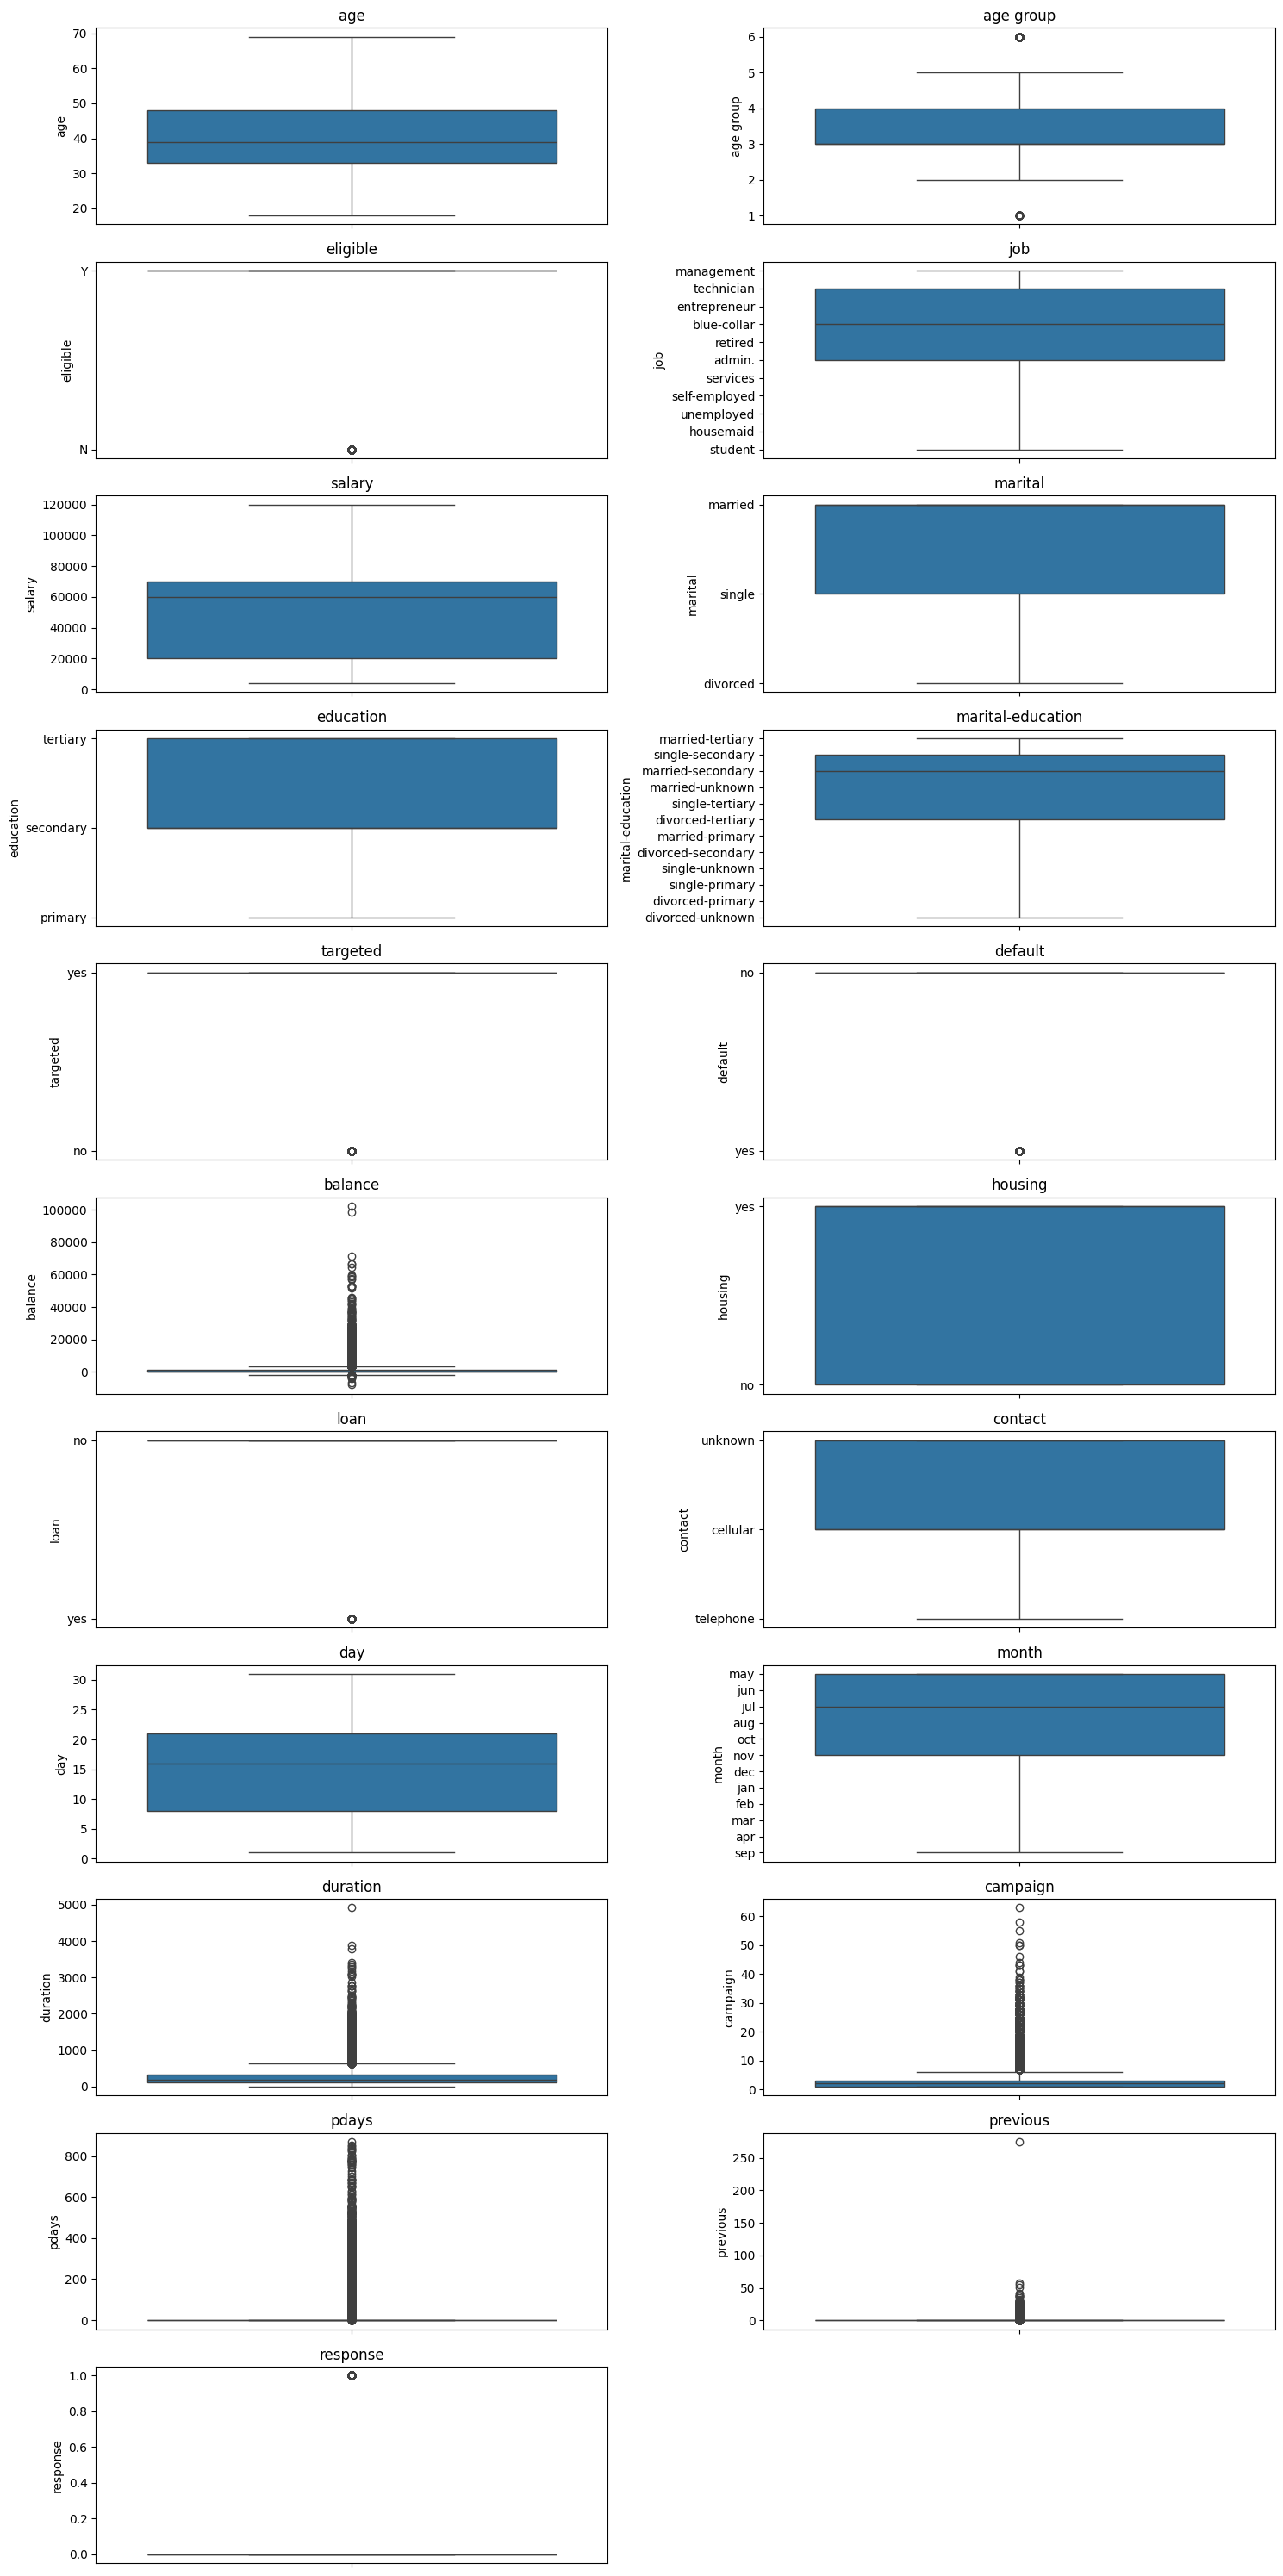

In [ ]:
col = list(df.columns)

n_cols = 2
n_rows = (len(col) + n_cols - 1) // n_cols


fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 30))


for ax in axes.flatten()[len(col):]:
    ax.remove()


axes_flat = axes.flatten()

for i, column_name in enumerate(col):

    sns.boxplot(df[column_name], ax=axes_flat[i])
    axes_flat[i].set_title(column_name)
    axes_flat[i].set_xticklabels(axes_flat[i].get_xticklabels(), rotation=45)


plt.tight_layout()

In [ ]:
df.drop(['age group','marital-education'],axis=1,inplace=True)

In [ ]:
df['response'] = df['response'].replace({0:'No',1:'Yes'})

In [ ]:
df.shape

(44377, 19)

# Features Selection

In [ ]:
df.shape

(44377, 19)

<ipython-input-27-00f8f512d86c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

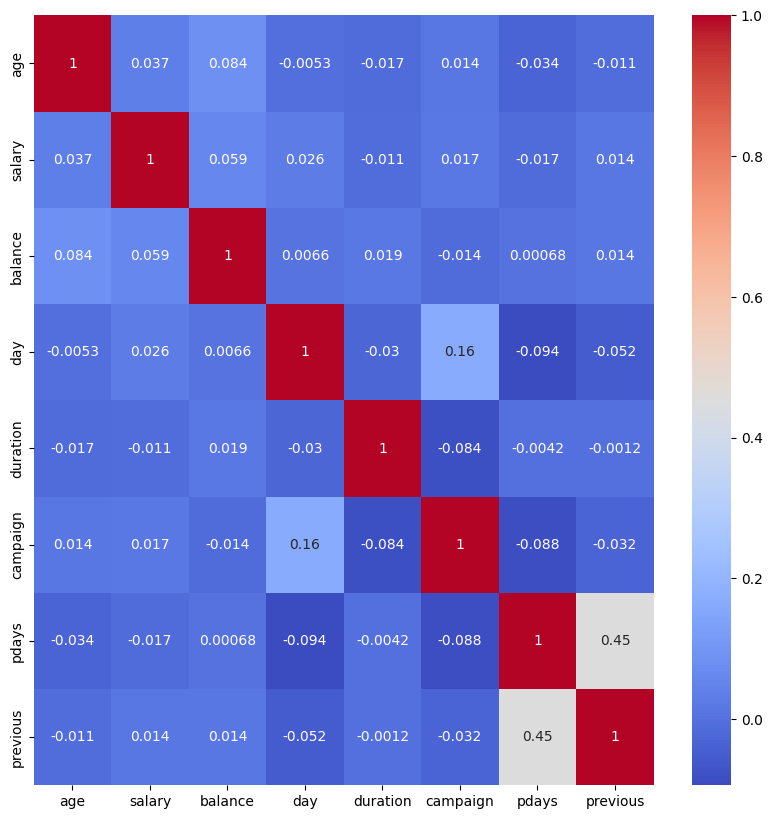

In [ ]:
corr = df.corr()


plt.figure(figsize=(10,10))

sns.heatmap(corr,cmap='coolwarm',annot=True)




In [ ]:

df.drop(['month','campaign','previous','day','default','eligible','housing','contact'],axis=1,inplace=True)

In [ ]:
df.head()

age           job  salary  marital  education targeted  balance loan  \
0   58    management  100000  married   tertiary      yes     2143   no   
1   44    technician   60000   single  secondary      yes       29   no   
2   33  entrepreneur  120000  married  secondary      yes        2  yes   
3   47   blue-collar   20000  married   tertiary       no     1506   no   
5   35    management  100000  married   tertiary      yes      231   no   

   duration  pdays response  
0       261     -1       No  
1       151     -1       No  
2        76     -1       No  
3        92     -1       No  
5       139     -1       No

# Feature Engineering

In [ ]:
df.groupby('job')['education'].value_counts()

job            education
admin.         secondary    4219
               tertiary      742
               primary       207
blue-collar    secondary    5369
               primary      3756
               tertiary      603
entrepreneur   tertiary      760
               secondary     541
               primary       183
housemaid      primary       613
               secondary     393
               tertiary      217
management     tertiary     8029
               secondary    1117
               primary       293
retired        secondary     837
               primary       572
               tertiary      367
self-employed  tertiary      867
               secondary     576
               primary       130
services       secondary    3457
               tertiary      352
               primary       345
student        secondary     508
               tertiary      386
               primary        44
technician     secondary    5226
               tertiary     2207
               pri

<BarContainer object of 11 artists>

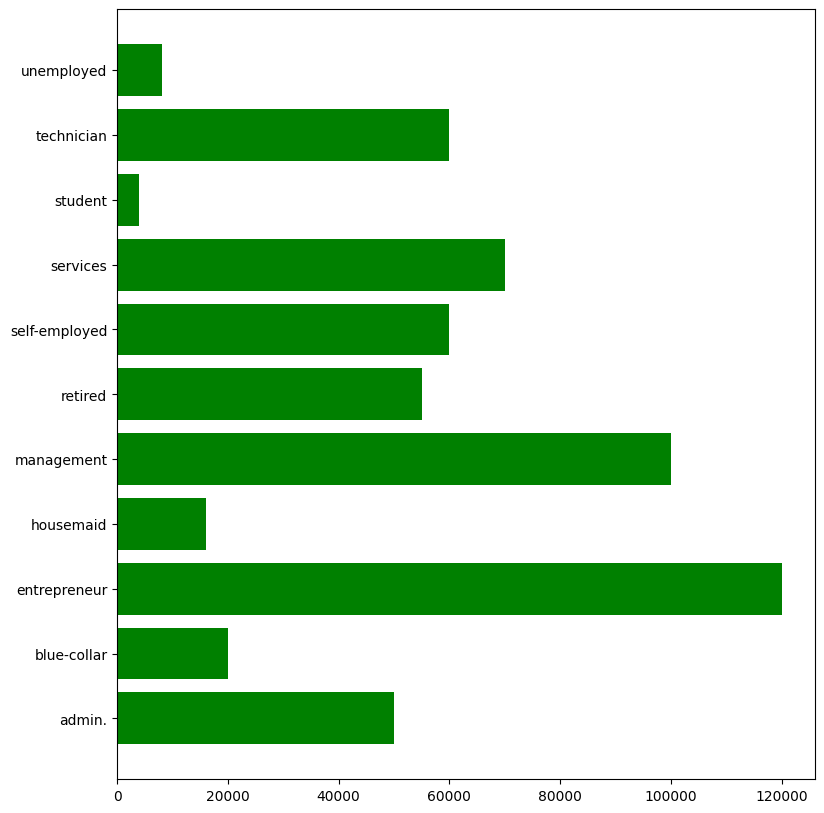

In [ ]:
fig,ax = plt.subplots(figsize=(9,10))

job_grp = df.groupby('job')['salary'].mean()
yerr_grp_job = df.groupby('job')['salary'].std()




mean_sal_job = list(job_grp.values)
idx_job = list(job_grp.index)


ax.barh(idx_job,mean_sal_job,color='green')

In [ ]:
df['job-education'] = df['job'].astype(str) + '-' + df['education'].astype(str)

In [ ]:
df.drop(['job','education'],axis=1,inplace=True)

In [ ]:
rank_map = {
    'student-primary': 0, 'student-secondary': 1, 'student-tertiary': 2,
    'unemployed-primary': 3, 'unemployed-secondary': 4, 'unemployed-tertiary': 5,
    'housemaid-primary': 6, 'housemaid-secondary': 7, 'housemaid-tertiary': 8,
    'blue-collar-primary': 9, 'blue-collar-secondary': 10, 'blue-collar-tertiary': 11,
    'admin.-primary': 12, 'admin.-secondary': 13, 'admin.-tertiary': 14,
    'retired-primary': 15, 'retired-secondary': 16, 'retired-tertiary': 17,
    'technician-primary': 18, 'technician-secondary': 19, 'technician-tertiary': 20,
    'self-employed-primary': 21, 'self-employed-secondary': 22, 'self-employed-tertiary': 23,
    'services-primary': 24, 'services-secondary': 25, 'services-tertiary': 26,
    'management-primary': 27, 'management-secondary': 28, 'management-tertiary': 29,
    'entrepreneur-primary': 30, 'entrepreneur-secondary': 31, 'entrepreneur-tertiary': 32,
}


df['job-education'] = df['job-education'].map(rank_map)

In [ ]:
df.head()

age  salary  marital targeted  balance loan  duration  pdays response  \
0   58  100000  married      yes     2143   no       261     -1       No   
1   44   60000   single      yes       29   no       151     -1       No   
2   33  120000  married      yes        2  yes        76     -1       No   
3   47   20000  married       no     1506   no        92     -1       No   
5   35  100000  married      yes      231   no       139     -1       No   

   job-education  
0             29  
1             19  
2             31  
3             11  
5             29

In [ ]:
df_orig = df.copy()

# Standartization

In [ ]:
num_var=df.select_dtypes(include=np.number).columns.to_list()

In [ ]:
from sklearn.preprocessing import StandardScaler

def scale_data(df, col):
    sc = StandardScaler()


    original_index = df.index


    scaled = sc.fit_transform(df[col])
    scaled = pd.DataFrame(scaled, columns=col, index=original_index)

    scaled_data = pd.concat([scaled, df.drop(columns=col)], axis=1)

    return scaled_data

In [ ]:
num_var

['age', 'salary', 'balance', 'duration', 'pdays', 'job-education']

In [ ]:
df = scale_data(df,num_var)

In [ ]:
df.head()

age    salary   balance  duration     pdays  job-education  marital  \
0  1.770106  1.330326  0.269632  0.013800 -0.409503       1.287989  married   
1  0.357124  0.081363 -0.439644 -0.413157 -0.409503       0.092412   single   
2 -0.753076  1.954808 -0.448703 -0.704264 -0.409503       1.527105  married   
3  0.659906 -1.167601  0.055910 -0.642162 -0.409503      -0.864051  married   
5 -0.551221  1.330326 -0.371870 -0.459734 -0.409503       1.287989  married   

  targeted loan response  
0      yes   no       No  
1      yes   no       No  
2      yes  yes       No  
3       no   no       No  
5      yes   no       No

# One Hot

In [ ]:
df_cp = df.copy()

hot_col = ['marital','targeted','response','loan']


hot = pd.get_dummies(df_cp[hot_col])
hot = hot.astype('float64')
df_cp = df_cp.drop(hot_col,axis=1)
df = df_cp.join(hot)

In [ ]:
df.head()

age    salary   balance  duration     pdays  job-education  \
0  1.770106  1.330326  0.269632  0.013800 -0.409503       1.287989   
1  0.357124  0.081363 -0.439644 -0.413157 -0.409503       0.092412   
2 -0.753076  1.954808 -0.448703 -0.704264 -0.409503       1.527105   
3  0.659906 -1.167601  0.055910 -0.642162 -0.409503      -0.864051   
5 -0.551221  1.330326 -0.371870 -0.459734 -0.409503       1.287989   

   marital_divorced  marital_married  marital_single  targeted_no  \
0               0.0              1.0             0.0          0.0   
1               0.0              0.0             1.0          0.0   
2               0.0              1.0             0.0          0.0   
3               0.0              1.0             0.0          1.0   
5               0.0              1.0             0.0          0.0   

   targeted_yes  response_No  response_Yes  loan_no  loan_yes  
0           1.0          1.0           0.0      1.0       0.0  
1           1.0          1.0           0.0      1.0       0.0  
2           1.0          1.0           0.0      0.0       1.0  
3           0.0          1.0           0.0      1.0       0.0  
5           1.0          1.0           0.0      1.0       0.0

# Dimensionality reduction -UMAP

In [ ]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.6 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=a8b4472b4d9d140a1e4f195ea86ddceb1d174b678b5a78417482d6da0a80f644
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
df.head()

age    salary   balance  duration     pdays  job-education  \
0  1.770106  1.330326  0.269632  0.013800 -0.409503       1.287989   
1  0.357124  0.081363 -0.439644 -0.413157 -0.409503       0.092412   
2 -0.753076  1.954808 -0.448703 -0.704264 -0.409503       1.527105   
3  0.659906 -1.167601  0.055910 -0.642162 -0.409503      -0.864051   
5 -0.551221  1.330326 -0.371870 -0.459734 -0.409503       1.287989   

   marital_divorced  marital_married  marital_single  targeted_no  \
0               0.0              1.0             0.0          0.0   
1               0.0              0.0             1.0          0.0   
2               0.0              1.0             0.0          0.0   
3               0.0              1.0             0.0          1.0   
5               0.0              1.0             0.0          0.0   

   targeted_yes  response_No  response_Yes  loan_no  loan_yes  
0           1.0          1.0           0.0      1.0       0.0  
1           1.0          1.0           0.0      1.0       0.0  
2           1.0          1.0           0.0      0.0       1.0  
3           0.0          1.0           0.0      1.0       0.0  
5           1.0          1.0           0.0      1.0       0.0

In [ ]:
from umap import UMAP
umap_3d = UMAP(n_components=3,init='spectral', random_state=42)

proj_3d = umap_3d.fit_transform(df[num_var])


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
df_copy = df.copy()
df_copy.drop(num_var,inplace=True,axis=1)
components = pd.DataFrame(proj_3d,columns=['U1','U2','U3'])

In [ ]:
df_copy.tail()

marital_divorced  marital_married  marital_single  targeted_no  \
45203               0.0              0.0             1.0          1.0   
45205               0.0              0.0             1.0          0.0   
45206               0.0              1.0             0.0          0.0   
45209               0.0              1.0             0.0          0.0   
45210               0.0              1.0             0.0          0.0   

       targeted_yes  response_No  response_Yes  loan_no  loan_yes  
45203           0.0          0.0           1.0      1.0       0.0  
45205           1.0          0.0           1.0      0.0       1.0  
45206           1.0          0.0           1.0      1.0       0.0  
45209           1.0          1.0           0.0      1.0       0.0  
45210           1.0          1.0           0.0      1.0       0.0

In [ ]:
components.tail()

U1        U2        U3
44372  1.308034  6.894237  4.077579
44373  6.056000 -2.964920  9.469308
44374  6.164954 -0.319865  6.095829
44375 -2.183008  4.435345  6.790953
44376  9.120965  8.025255  6.748363

In [ ]:
components.reset_index(drop=True, inplace=True)
df_copy.reset_index(drop=True, inplace=True)

In [ ]:
df_umap = pd.concat([components, df_copy], axis=1)

In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    df_umap,
    x = 'U1',
    y = 'U2',
    z = 'U3'
)
fig.update_layout(width=1000, height=1000)
fig.update_traces(marker_size=2)

# Elbow Method

In [ ]:
pip install kmodes


In [ ]:
pip install yellowbrick


In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


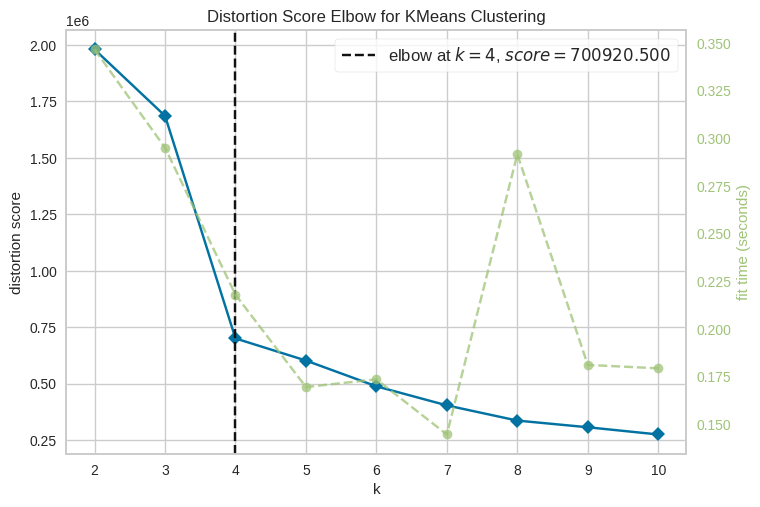

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
Elbow_M = KElbowVisualizer(KMeans(n_init='auto',init='k-means++', max_iter=500, tol=0.0001, random_state=42))
Elbow_M.fit(df_umap)
Elbow_M.show()

# Selecting the number of clusters

In [ ]:
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

In [ ]:
# K MEANS
def visualize_silhouette_kmeans(df, max_clusters):
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=35, max_iter=500, tol=0.0001, random_state=42)

        visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
        visualizer.fit(df)

        visualizer.show()

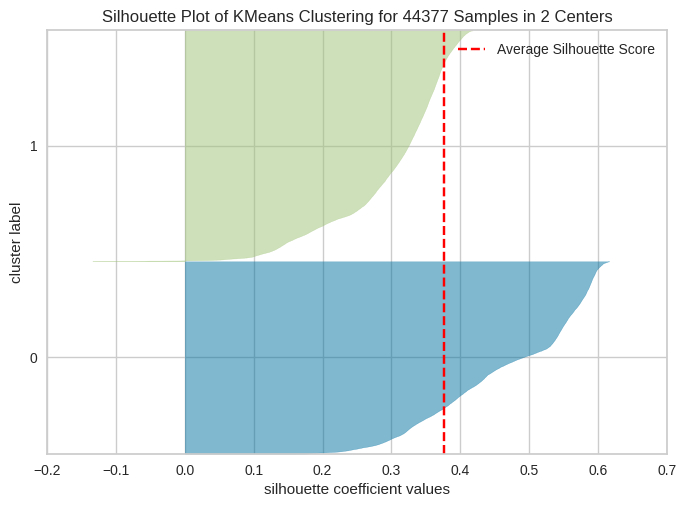

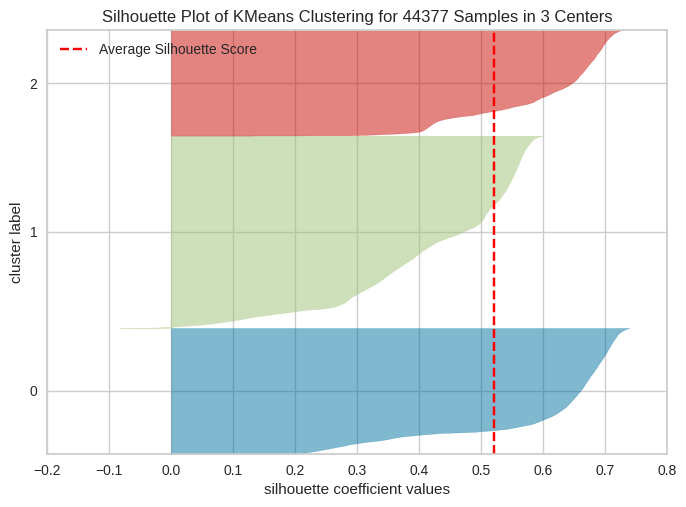

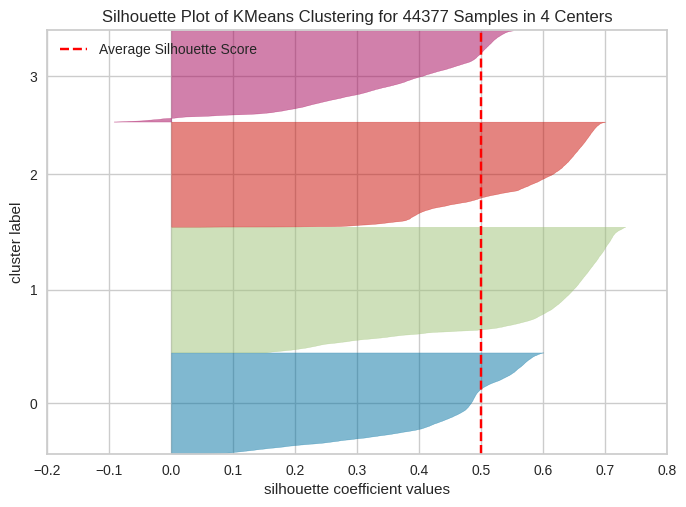

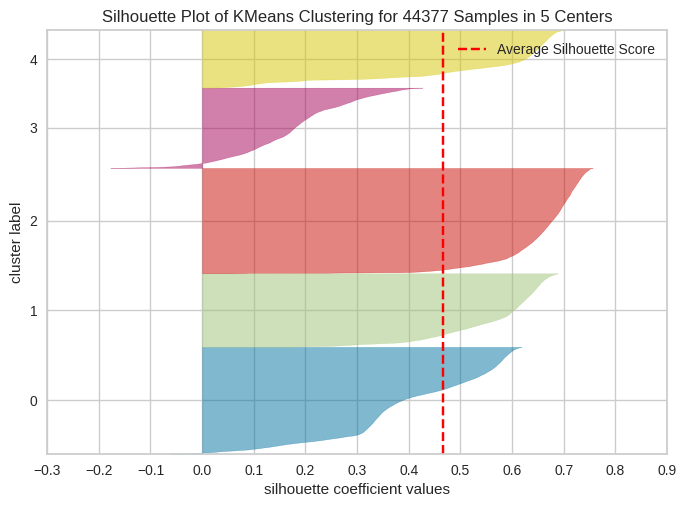

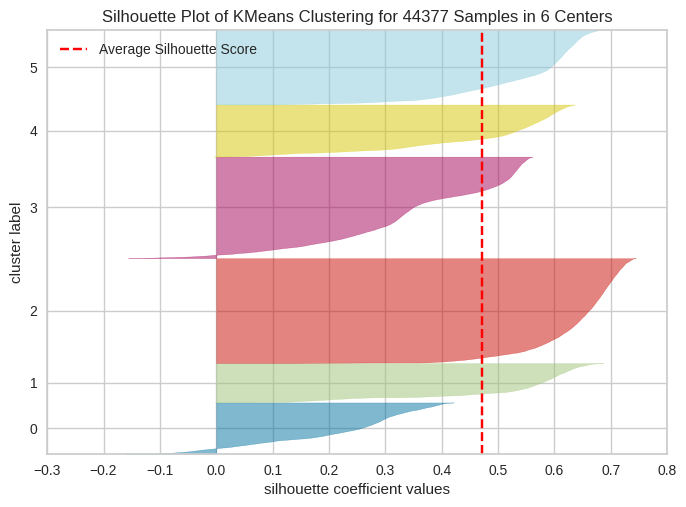

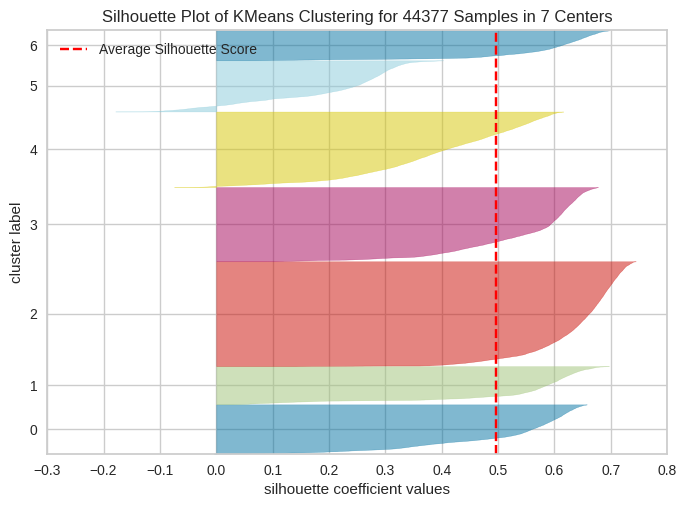

In [ ]:
visualize_silhouette_kmeans(df_umap, 7)

In [ ]:

def visualize_kmeans(df, max_clusters):
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=35, max_iter=500, tol=0.0001, random_state=42)

        df['cluster'] = kmeans.fit_predict(df)


        cluster_counts = df['cluster'].value_counts().sort_index()

        # Візуалізація
        plt.figure(figsize=(10, 6))
        sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
        plt.title(f'Розподіл кількості значень по кластерах для n_clusters = {n_clusters}')
        plt.xlabel('Номер кластера')
        plt.ylabel('Кількість значень')
        plt.xticks(range(n_clusters))
        plt.show()


        df.drop('cluster', axis=1, inplace=True)

<ipython-input-60-7109c166cc7b>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




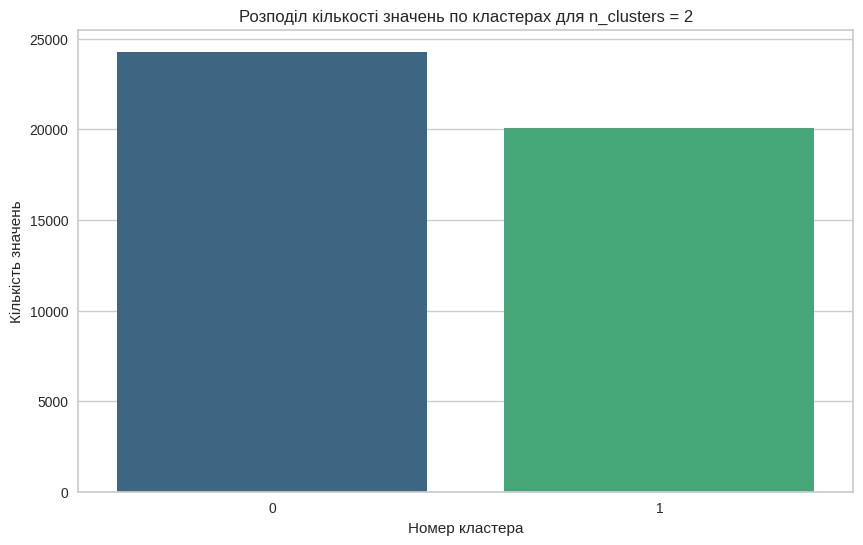

<ipython-input-60-7109c166cc7b>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




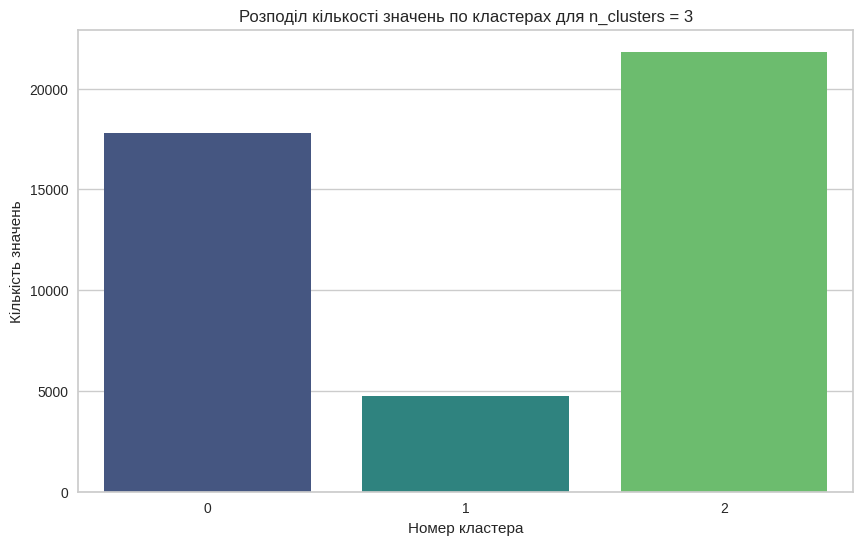

<ipython-input-60-7109c166cc7b>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




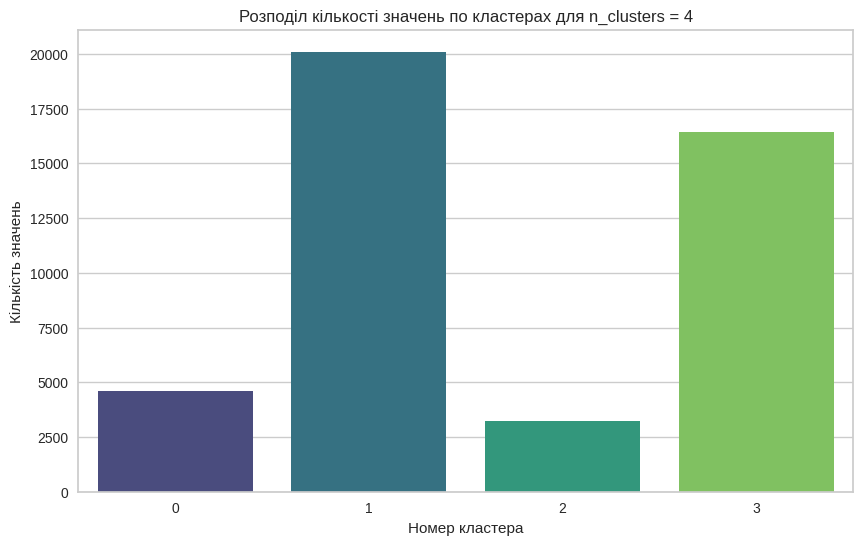

<ipython-input-60-7109c166cc7b>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




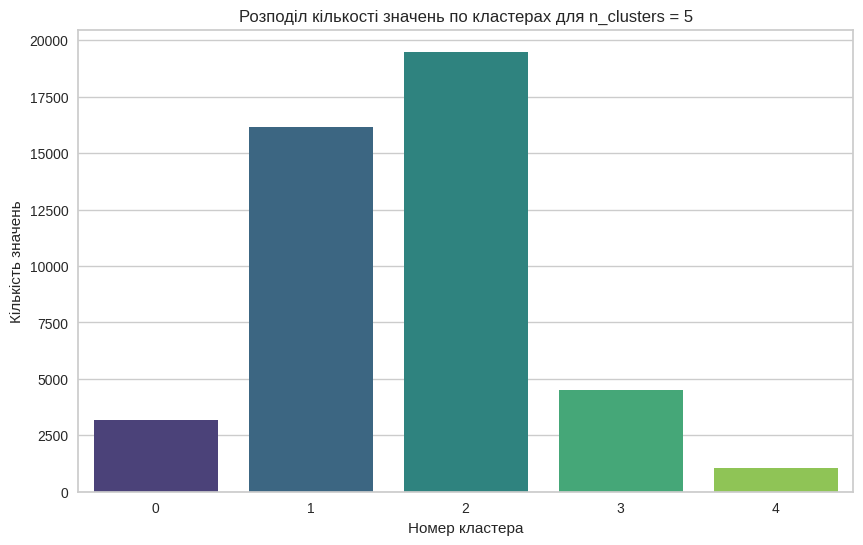

<ipython-input-60-7109c166cc7b>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




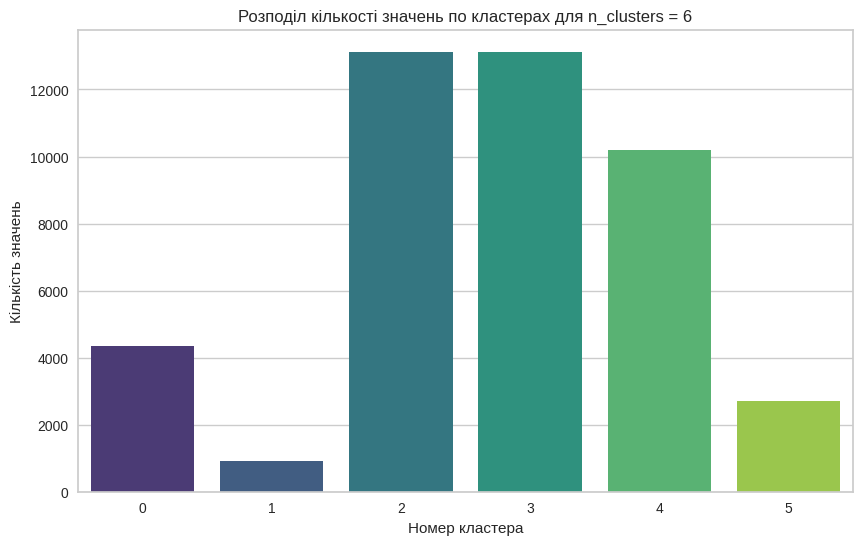

<ipython-input-60-7109c166cc7b>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




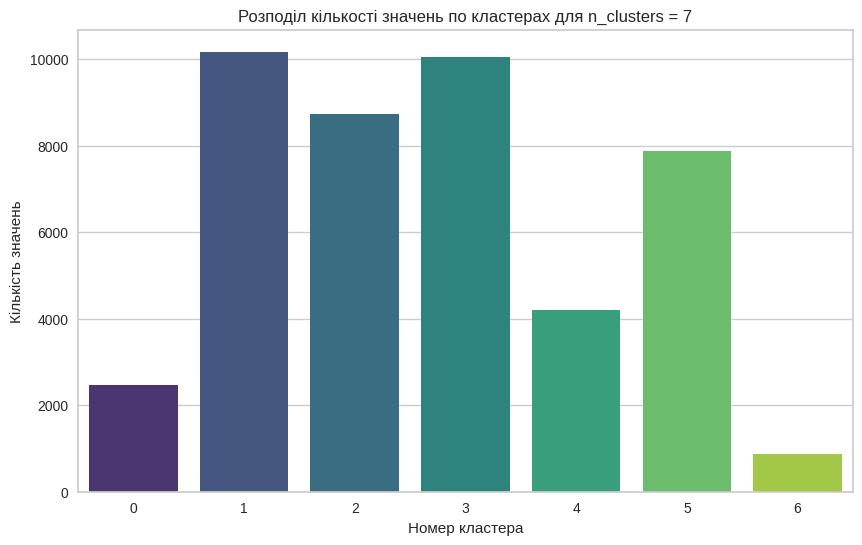

In [ ]:
visualize_kmeans(df, 7)

In [ ]:
# K MEANS

def Clustering_scores(df,k):
  k = k

  calinski_score = []
  davies_score = []
  clusters = range(2, k + 1)

  for m_k in clusters:
      kmeans_mod = KMeans(n_clusters=m_k, init="k-means++", n_init=40, max_iter=500, tol=0.0001, random_state=42).fit(df)
      cal_score = calinski_harabasz_score(df, kmeans_mod.labels_)
      dav_score = davies_bouldin_score(df, kmeans_mod.labels_)
      calinski_score.append(cal_score)
      davies_score.append(dav_score)

  plt.figure(figsize=(12, 6))

  plt.subplot(121)
  plt.plot(clusters, calinski_score, marker='o', linestyle='--', color='g')
  plt.xlabel("Кластери")
  plt.ylabel("Calinski Оцінка")
  plt.title("Кластери v/s Calinski Оцінка")

  plt.subplot(122)
  plt.plot(clusters, davies_score, marker='o', linestyle='--', color='orange')
  plt.xlabel("Кластери")
  plt.ylabel("Davies Оцінка")
  plt.title("Кластери v/s Davies Оцінка")

  plt.tight_layout()
  plt.show()

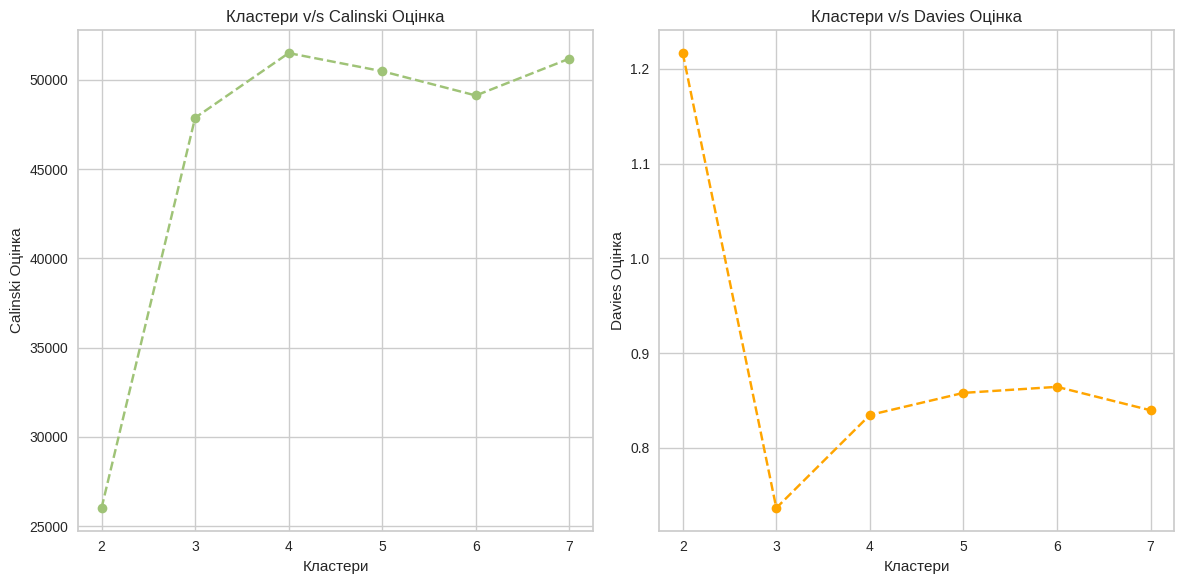

In [ ]:
Clustering_scores(df_umap,7)

# Model training


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 40 ,max_iter=500, tol=0.0001, random_state= 42 ) )
algorithm.fit(df_umap)
labels= algorithm.labels_
centroids = algorithm.cluster_centers_


In [ ]:
y_kmeans = algorithm.fit_predict(df_umap)
y_kmeans = list(y_kmeans)

df_orig['cluster'] = y_kmeans

# Interpretation

In [ ]:
fig = px.scatter_3d(
    x = df_umap.iloc[:,0],
    y = df_umap.iloc[:,1]     ,
    z = df_umap.iloc[:,2],
    color=df_orig['cluster']
)
fig.update_layout(width=1000, height=1000)
fig.update_traces(marker_size=2)

Text(0.5, 1.0, 'Distribution of The Clusters')

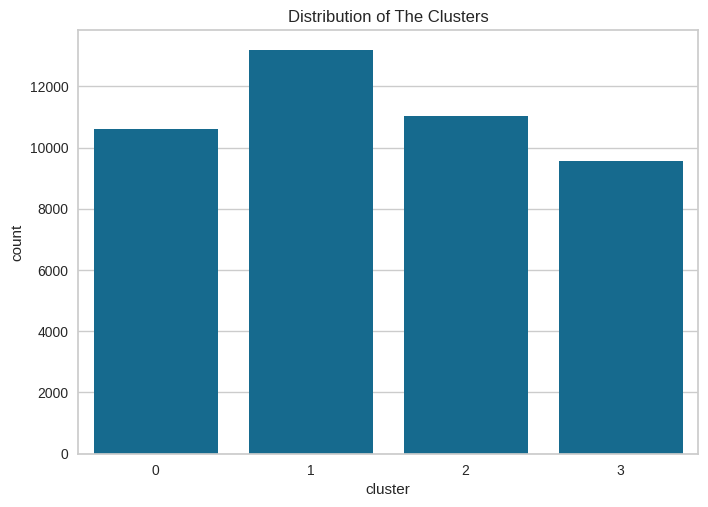

In [ ]:
pl = sns.countplot(x=df_orig['cluster'])
pl.set_title('Distribution of The Clusters')

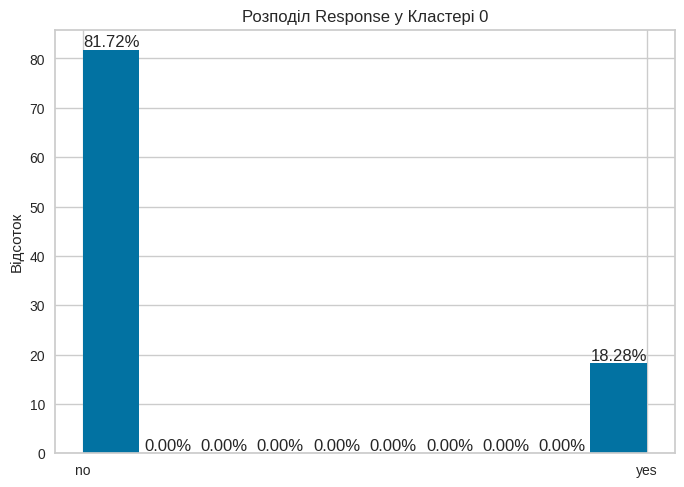

In [395]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = df_orig[df_orig['cluster'] == 0]['loan']
weights = np.ones_like(data) / len(data)
n, bins, patches = plt.hist(data, weights=weights * 100, bins=10)
for i in range(len(n)):
    plt.text(bins[i]+(bins[i+1]-bins[i])/2, n[i], f'{n[i]:.2f}%', ha='center', va='bottom')

plt.ylabel('Відсоток')
plt.xlabel('Loan')
plt.title('Розподіл Response у Кластері 0')

plt.show()


In [385]:
df_orig[(df_orig['cluster'] == 3) &  (df_orig['balance'] < 0)]['balance'].count()

796

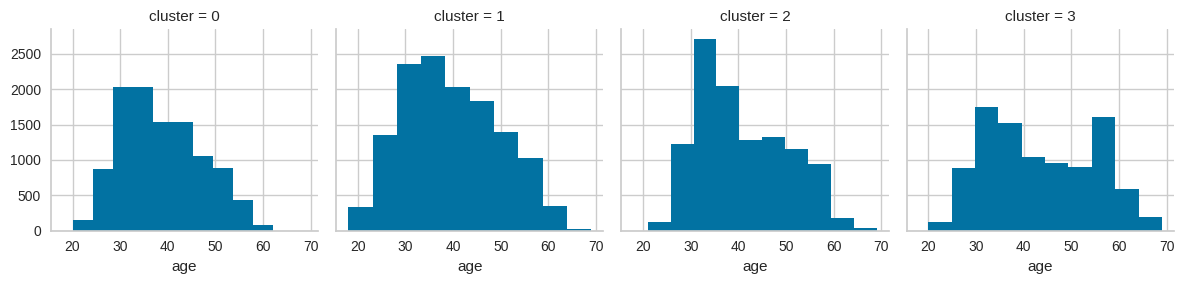

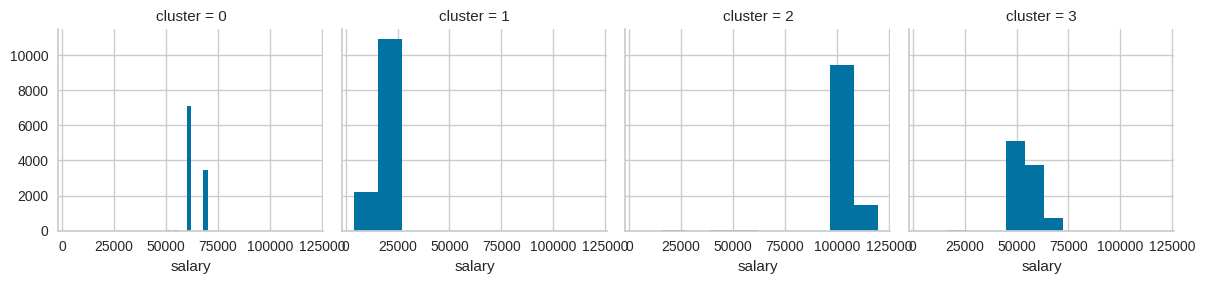

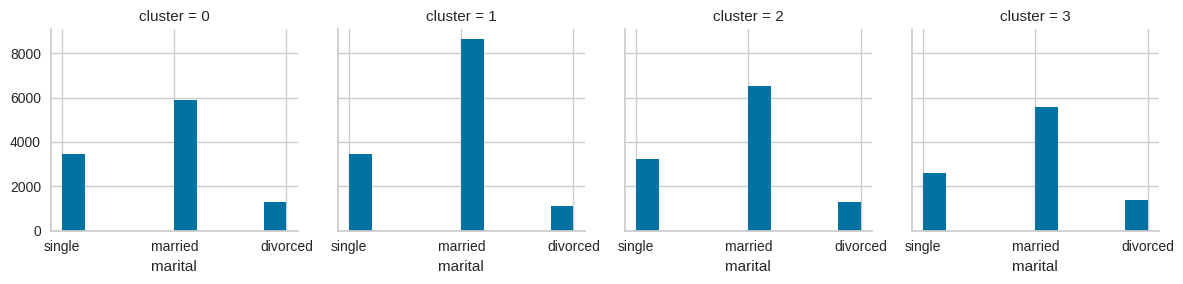

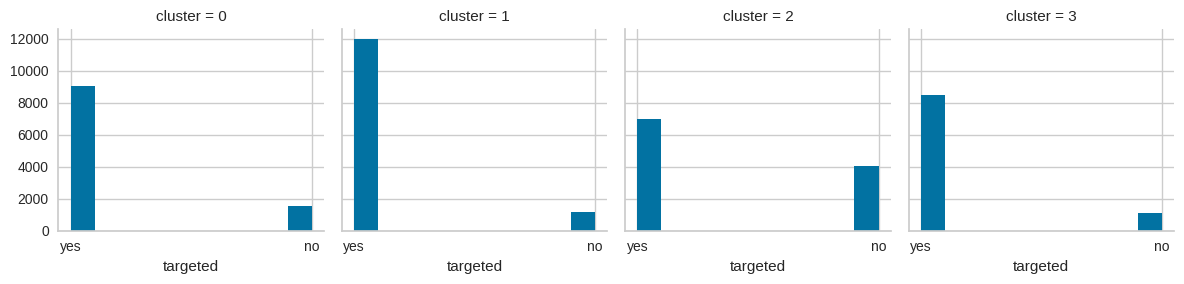

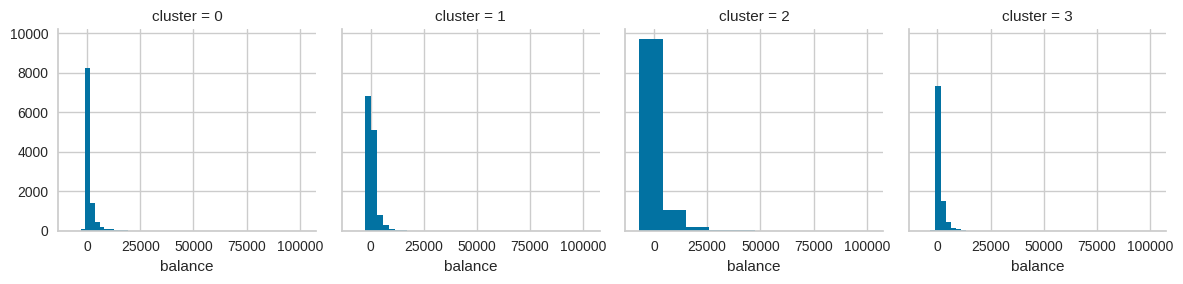

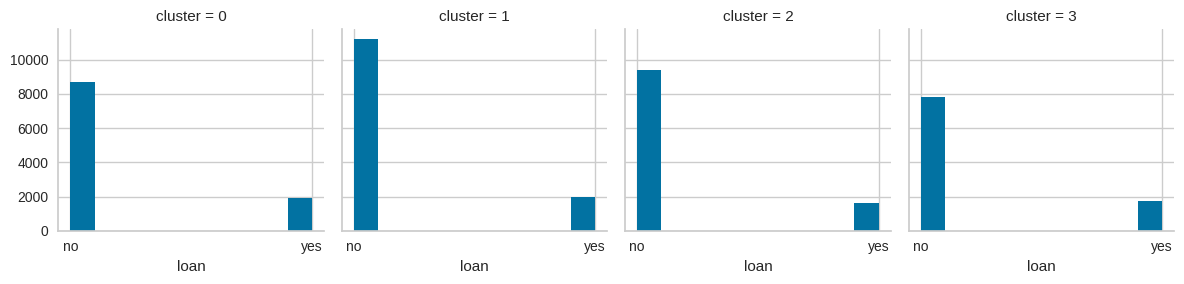

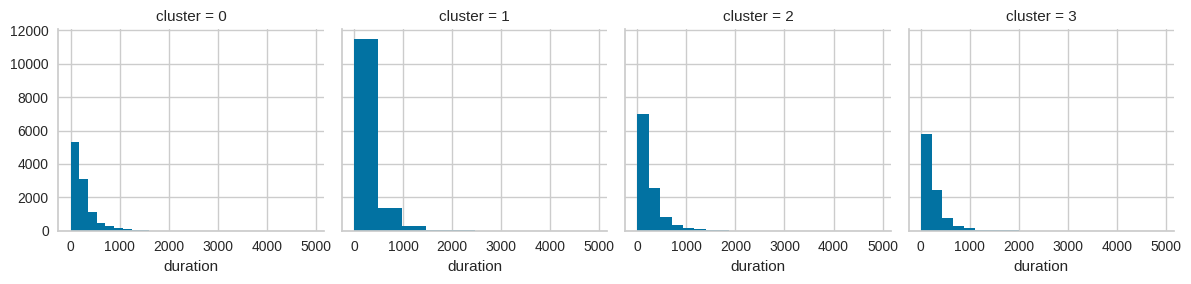

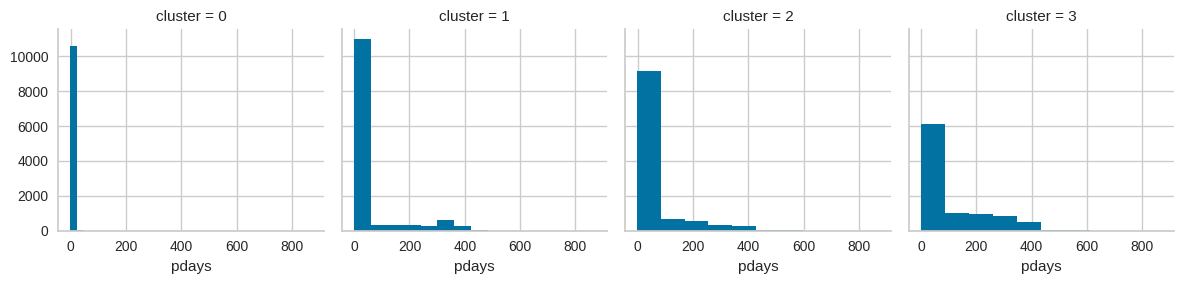

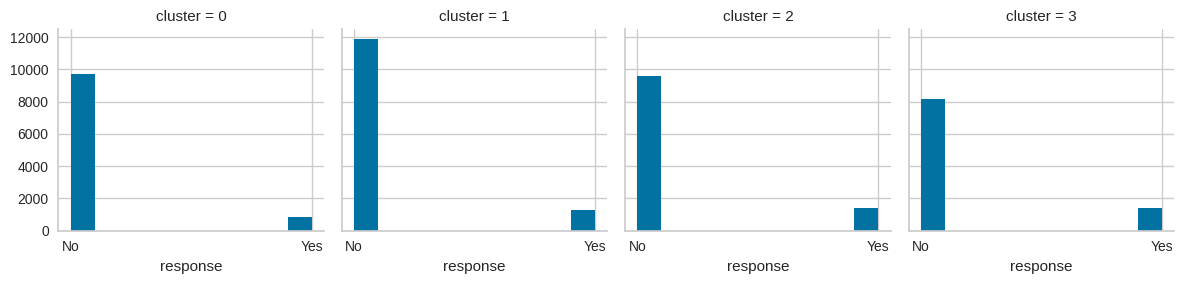

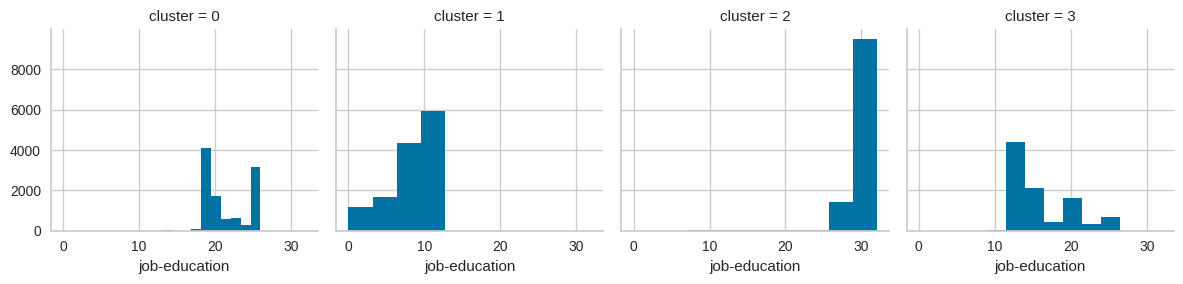

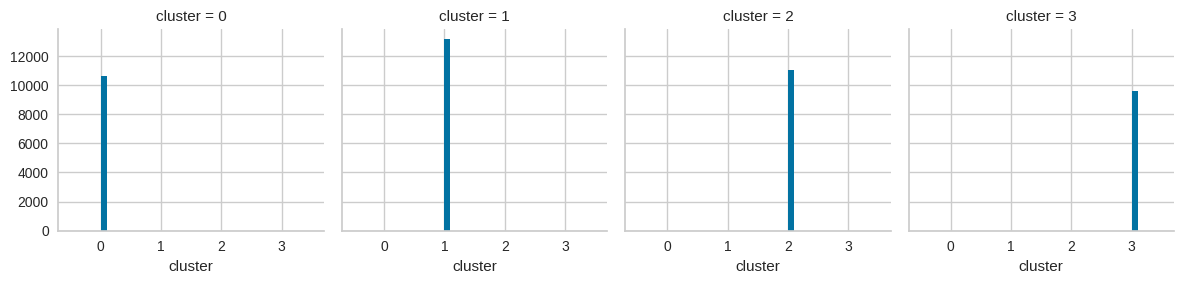

In [ ]:
for c in df_orig:
    grid= sns.FacetGrid(df_orig, col='cluster')
    grid.map(plt.hist, c)

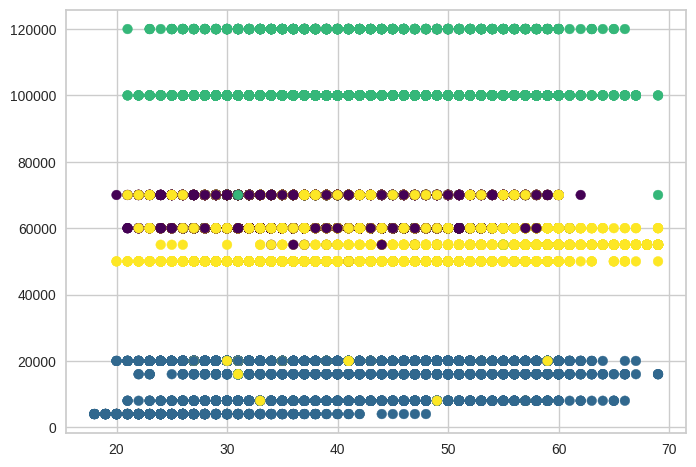

In [424]:
fig,ax = plt.subplots()

ax.scatter(df_orig['age'],df_orig['salary'],c=df_orig['cluster'], cmap='viridis')

# Information about clusters

## Customer Clusters Overview

### **Cluster 0:**
- **Age Range:** Most customers are between the ages of 30 and 43.
- **Income:** Salaries are mostly between 60k and 70k, indicating a middle to high class.
- **Previously Applied (number of people) (p days > -1):** Less than 1%.
- **Negative Balance:** 10% of customers.
- **Professional Status:** The majority are technicians (secondary, tertiary), services (secondary), with a smaller number of self-employed (tertiary).
- **Intention to Purchase:** The lowest percentage of positive responses is 8%.

### **Cluster 1:**
- **Age Range:** Large spread, mostly from 28 to 50 years old.
- **Income:** On average 18-20k, with some cases 4-8k.
- **Previously Applied (number of people) (p days > -1):** Up to 17%.
- **Negative Balance:** 9% of clients.
- **Professional Status:** Mostly blue-collar (primary, secondary), as well as unemployed and students.
- **Desire to Make a Purchase:** 9%.

### **Cluster 2:**
- **Age Range:** Most customers are in the age range of 30-46 years.
- **Income:** On average 100k, with a lower case of 120k salary.
- **Average Balance:** Highest among all clusters at 1966.
- **Negative Balance:** 6% of clients.
- **Previously Applied (number of people) (p days > -1):** Up to 18%.
- **Professional Status:** Mostly management (management-tertiary), with lesser cases of management (secondary) and entrepreneurs (secondary, tertiary).
- **Target Audience:** The least targeted, only 63%.
- **Willingness to Purchase:** 13%.

### **Cluster 3:**
- **Age Range:** Most commonly found in the 30-40 and 55-60 age ranges.
- **Income:** Ranges from 50k to 70k.
- **Previously Applied (number of people) (p days > -1):** Up to 38%.
- **Negative Balance:** 8% of clients.
- **Professional Status:** Mostly administrative staff (secondary), with a smaller number of technicians (tertiary) and retirees.
- **Desire to Make a Purchase:** 15%.


## Short names for clusters based on analysis

### 0 cluster - (middle disloyal) class
### 1 cluster - (lower) class
### 2 cluster - (high) class
### 3 cluster - (middle loyal) class